Run pip install if there is no uproot package:
```bash
pip install uproot4 awkward1 particle boost-histogram matplotlib  pandas numexpr autograd hist hist[plot] ipy_table
```

You can install it right from jupyter by adding ! in the begining. Create a new cell in Jupyter and put there

```python
 !pip ... # the line above
```

"!" sign allows to run any console command. Like

```python
 !env|grep USER
```
That is cool because you can save and document bash commands.
One can even install pure bash notebooks (with bash language instead of python)


In [1]:
!ls -lah *.root

-rw-rw-r-- 1 romanov romanov 3.0M Dec 13 13:07 mlp_run001439.root
-rw-rw-r-- 1 romanov romanov 525K Dec 13 13:06 mlp_run073032.root


In [2]:
import uproot4

# For pretty printing arrays
from pprint import pprint

file=uproot4.open("mlp_run073032.root")

# To see all object names in the file:
file.items()
#pprint(zip(file.keys(), file.values()))

# To see items in subdirectories
# file.keys(recursive=True)

# There are more functions related to file:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyFile.html

# Root directories:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyDirectory.html

# To read multiple files at once (aka TChain)
# https://uproot.readthedocs.io/en/latest/basic.html#iterating-over-many-files


[('sig_tst;1', <TTree 'sig_tst' (21 branches) at 0x7f93f69c60a0>),
 ('bg_tst;1', <TTree 'bg_tst' (21 branches) at 0x7f93f6913550>),
 ('signal;1', <TTree 'signal' (20 branches) at 0x7f93f68d2070>),
 ('background;1', <TTree 'background' (20 branches) at 0x7f93f688a3a0>),
 ('simu;1', <TTree 'simu' (21 branches) at 0x7f93f68436d0>),
 ('dispe;1', <TH2F (version 4) at 0x7f93f681a190>),
 ('disppi;1', <TH2F (version 4) at 0x7f93f6801340>),
 ('hits2d;1', <TH2F (version 4) at 0x7f93f68013a0>),
 ('hbeamX;1', <TH1F (version 3) at 0x7f93f6722c70>),
 ('rad2d;1', <TH2F (version 4) at 0x7f93f6614580>),
 ('norad2d;1', <TH2F (version 4) at 0x7f93f66145e0>),
 ('gem2d;1', <TH2F (version 4) at 0x7f93f66c7190>),
 ('rad;1', <TH1F (version 3) at 0x7f93f66cf550>),
 ('norad;1', <TH1F (version 3) at 0x7f93f66cf5b0>),
 ('rad2;1', <TH1F (version 3) at 0x7f93f66a6790>),
 ('norad2;1', <TH1F (version 3) at 0x7f93f66c4a00>),
 ('rad2e;1', <TH1F (version 3) at 0x7f93f66c4a60>),
 ('norad2e;1', <TH1F (version 3) at 0x7f93

In [3]:
# Get trees
signal_tree = file['signal']
background_tree = file['background']

# Print number of entries
print(f"Number of entries: {signal_tree.num_entries}")

# To look at tree branches and their types
background_tree.show()

# More TBranch functions:
#https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html


Number of entries: 59
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
par0                 | float                    | AsDtype('>f4')
par1                 | float                    | AsDtype('>f4')
par2                 | float                    | AsDtype('>f4')
par3                 | float                    | AsDtype('>f4')
par4                 | float                    | AsDtype('>f4')
par5                 | float                    | AsDtype('>f4')
par6                 | float                    | AsDtype('>f4')
par7                 | float                    | AsDtype('>f4')
par8                 | float                    | AsDtype('>f4')
par9                 | float                    | AsDtype('>f4')
par10                | float                    | AsDtype('>f4')
par11                | float                    | AsDtype('>f4')
par12                | float        

In [4]:
# To load WHOLE branch as an array:
par0 = signal_tree['par0'].array(library='np')

# library=np to return/convert array as a numpy library. Kind of standard to work with tensorflow
print(par0)

[ 5.81875    7.471875   4.9234376 88.425     10.348437   5.2375
  5.4046874 22.153126  22.614063   7.365625   3.134375   0.
  8.19375   42.84844   12.860937   7.928125  10.65625   24.275
  5.290625   9.732813  15.090625  57.02656   12.657812   6.8390627
 10.223437   0.         7.834375   3.8671875  2.6625    30.889063
 72.79375    5.7390623 16.839062   0.        80.44844    8.839063
 16.170313   9.325     44.259377  13.259375  30.85625   36.82969
  7.1734376 20.957813  10.6953125  3.3390625 14.360937   0.
 25.832813  10.0859375  2.5515625  9.615625   3.6984375  7.5109377
  9.040625  60.15625    9.275     25.420313  13.359375 ]


In [5]:
# It is possible to convert multiple branches, apply formulas, aliases, etc.
# arrays method is to be used for this

# For numpy:
params = signal_tree.arrays(filter_name="par*", library='np')

# The resulting will be a dict like:
# { 'par0': array([ 5.81875  ,  7.471875 ,  ...],
#   'par1': array([ 5., 14.,  3., ... ],
#   ...}

# If you need only arrays:
array_of_params = params.values()

# Finally you can unpack it as values (I use only 3 of pars here using [0,1,2] mask)
par0, par1, par2 = signal_tree.arrays(filter_name="par[0,1,2]", library='np').values()

# Full info on this array methods
# https://uproot.readthedocs.io/en/latest/basic.html#reading-multiple-tbranches-as-a-group-of-arrays

In [6]:
# Another very popular array/data manipulation library in python is Pandas,
# Just set library=pd to save to pandas

params = signal_tree.arrays(filter_name="par[1-5]", library='pd')

# Library=pd
params.head()


,par1,par2,par3,par4,par5
0,5.0,4.378750,1.662219,1.049594,0.0
1,14.0,8.333438,6.141594,3.248687,0.0
2,3.0,2.818438,0.584703,0.000000,0.0
3,20.0,70.418747,49.566578,47.095421,14.0
4,11.0,5.943438,4.185469,3.018703,0.0


In [7]:
# (!!!!)  THAT IS IT  (!!!!)

# If you have a large file, you want to read it in chunks. The chunks are arrays as above
#https://uproot.readthedocs.io/en/latest/basic.html#iterating-over-intervals-of-entries

# The idea is to make those chunks the same size as training batches
for batch in signal_tree.iterate(step_size=10):
    print(repr(batch))

# Iterate has the same functionality as 'arrays'
# https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html#iterate


<Array [{par0: 5.82, ... ievent: 55192}] type='10 * {"par0": float32, "par1": fl...'>
<Array [{par0: 3.13, ... ievent: 86118}] type='10 * {"par0": float32, "par1": fl...'>
<Array [{par0: 15.1, ... ievent: 100461}] type='10 * {"par0": float32, "par1": f...'>
<Array [{par0: 72.8, ... ievent: 131768}] type='10 * {"par0": float32, "par1": f...'>
<Array [{par0: 30.9, ... ievent: 180163}] type='10 * {"par0": float32, "par1": f...'>
<Array [{par0: 2.55, ... ievent: 216776}] type='9 * {"par0": float32, "par1": fl...'>


## Histograms

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7f93cdb052e0>, errorbar=None, legend_artist=None)]

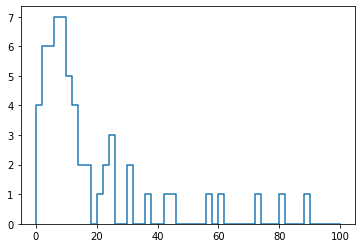

In [8]:
from hist import Hist
import hist

# If you need to build a histogram from a tree, here is the most "ROOT way":

# fill the axes
axis = hist.axis.Regular(50, 0, 100, name="S", label="s [units]", underflow=False, overflow=False)
h = Hist(axis)

h.fill(par0)
h.plot()

# More on hist library
# https://hist.readthedocs.io/en/latest/
# https://github.com/scikit-hep/hist

# The library is very new and there might be bugs, there are a couple of other
# libraries that can work with histograms. Let me know

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7f93cb9e4970>, errorbar=None, legend_artist=None)]

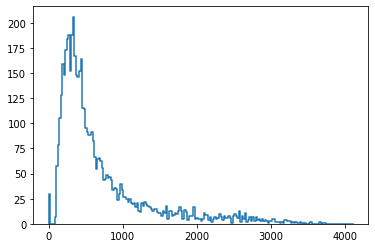

In [9]:
# Plotting existing histograms:
file['norad2'].to_hist().plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f93cb9c0eb0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f93cb953310>)

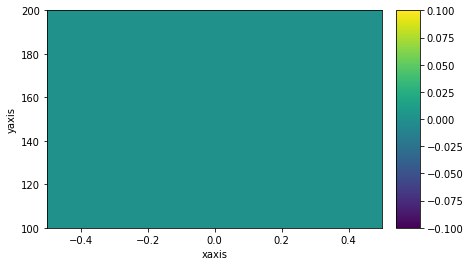

In [10]:
# Plotting existing 2D histograms
file['trka2'].to_hist().plot()
